In [1]:
!pip3 install torch torchvision

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torchvision.datasets as dset

# torchvision 자체에 MNIST 데이터셋이 있음.
from torchvision.datasets import MNIST

import torchvision.transforms as transforms
from torch import nn
from torchvision import datasets, transforms

%matplotlib inline

In [3]:
# GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
# 데이터 transform - 정규화. 평균 0.5, 표준편차 1.0

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (1.0,))
    ]
)

In [5]:
# 데이터 정의

dir = './MNIST_DATASET'

train_dataset = MNIST(dir, 
                      transform=transform, 
                      train=True, 
                      download=True)
 
test_dataset = MNIST(dir,
                     transform=transform,
                     train=False,
                     download=True)


Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw




Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw




Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw




Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [18]:
# 데이터 로딩 - dataloader

from torch.utils.data import DataLoader

num_classes = 10
learning_rate = 0.001
num_epochs = 30
batch_size = 100

train_loader = DataLoader(dataset=train_dataset,
                          batch_size = batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size = batch_size,
                         shuffle=True)

In [19]:
# 클래스 지정

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [25]:
# 이미지 보여주기

def imshow(image):
  image = image / 2 + 0.5
  numpy_image = image.numpy()
  plt.imshow(np.transpose(numpy_image, (1, 2, 0)))
  plt.show()

In [93]:
# MNIST 살펴보기

image, label = train_dataset[0]
image.shape

torch.Size([1, 28, 28])

In [94]:
label

5

Text(0.5, 1.0, 'The number is 5')

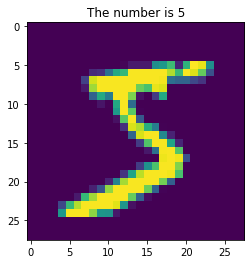

In [98]:
plt.imshow(image.reshape(28, 28))
plt.title('The number is %d' % label)

Text(0.5, 1.0, 'The number : 5')

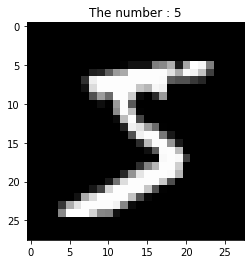

In [100]:
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('The number : %d' % label)

In [125]:
X_train = train_dataset.data.view(len(train_dataset), 1, 28, 28).float().to(device)
Y_train = train_dataset.targets.to(device)

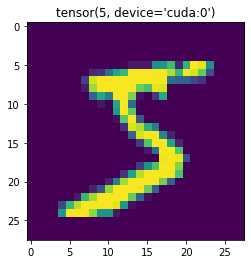

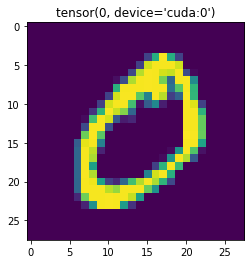

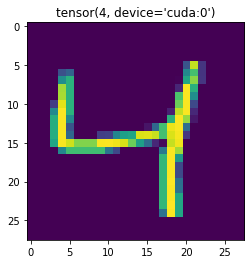

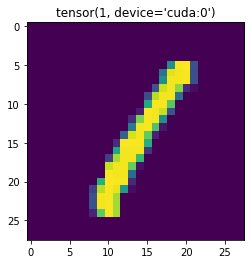

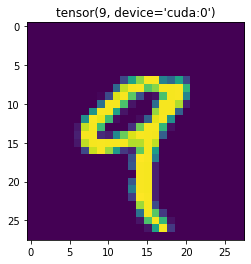

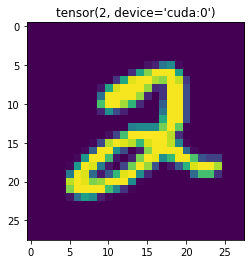

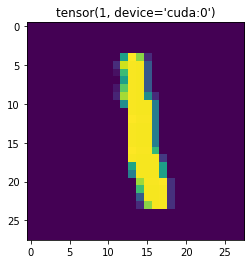

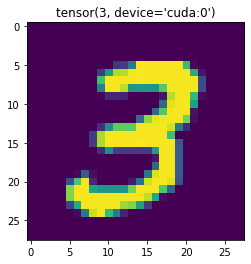

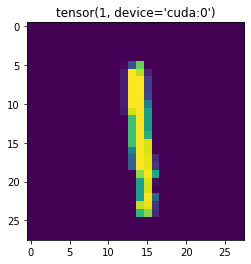

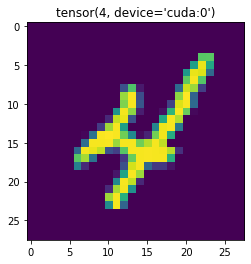

<Figure size 432x288 with 0 Axes>

In [126]:
for i in range(10):
  plt.imshow(X_train[i].cpu().reshape(28, 28))
  plt.title(Y_train[i])
  plt.figure()

In [127]:
# CNN 모델 정의

class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(1, 32, 3, 1),
        nn.Conv2d(32, 8, 3, 1),
        nn.Flatten(),
        nn.Linear(24*24*8,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,10)        
    )

  def forward(self, x):
    x = self.model(x)
    x = torch.softmax(x, dim=-1)
    return x

In [128]:
model = CNNModel().to(device)
model

CNNModel(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(32, 8, kernel_size=(3, 3), stride=(1, 1))
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=4608, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [129]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [130]:
# 모델 학습

for epoch in range(num_epochs):
    average_cost = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        average_cost += loss.item() / batch_size

    if epoch % 2 == 0:
        print("Epoch [%d / %d], Loss: %.8f" % (epoch + 1, num_epochs, average_cost))

print("Finished")

Epoch [1 / 30], Loss: 1.76041346
Epoch [3 / 30], Loss: 1.53214972
Epoch [5 / 30], Loss: 1.51290024
Epoch [7 / 30], Loss: 1.50080348
Epoch [9 / 30], Loss: 1.50035440
Epoch [11 / 30], Loss: 1.49258222
Epoch [13 / 30], Loss: 1.49083638
Epoch [15 / 30], Loss: 1.48920935
Epoch [17 / 30], Loss: 1.48565012
Epoch [19 / 30], Loss: 1.48834669
Epoch [21 / 30], Loss: 1.48442883
Epoch [23 / 30], Loss: 1.48162841
Epoch [25 / 30], Loss: 1.48352313
Epoch [27 / 30], Loss: 1.48481503
Epoch [29 / 30], Loss: 1.48548329
Finished


In [131]:
print(len(train_dataset))
print(len(test_dataset))
print(batch_size)
print(len(train_loader))
print(len(test_loader))

60000
10000
100
600
100


In [132]:
with torch.no_grad():
    X_test = test_dataset.data.view(len(test_dataset), 1, 28, 28).float().to(device)
    Y_test = test_dataset.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.973800003528595


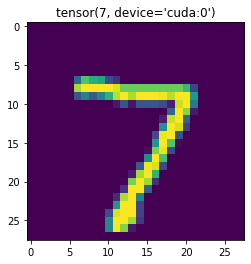

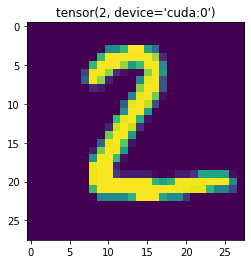

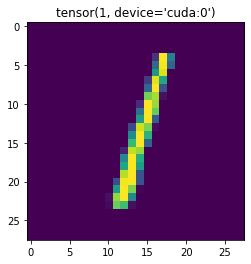

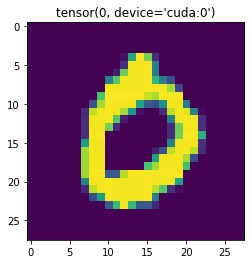

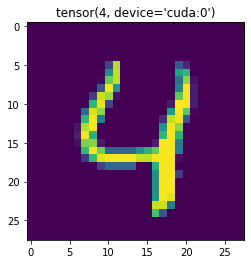

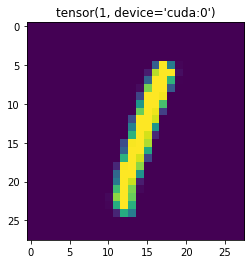

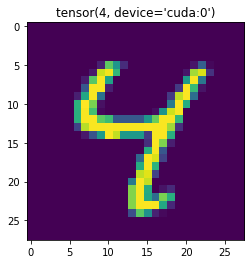

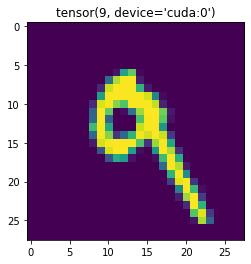

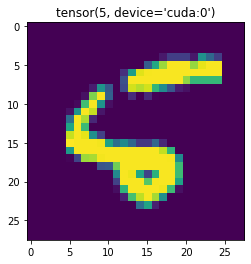

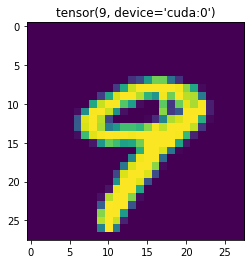

<Figure size 432x288 with 0 Axes>

In [133]:
for i in range(10):
  plt.imshow(X_test[i].cpu().reshape(28, 28))
  plt.title(Y_test[i])
  plt.figure()